In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from utils import reduced_classes_with_other

X_train, X_test, y_train, y_test = reduced_classes_with_other()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to categorical one-hot encoding
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

# Ensure y_test_encoded has the same columns as y_train_encoded
y_test_encoded = y_test_encoded.reindex(columns=y_train_encoded.columns, fill_value=0)

# Define the model
model = Sequential()
model.add(Dense(512, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Slightly lower dropout rate for deeper layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Slightly lower dropout rate for deeper layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Slightly lower dropout rate for deeper layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Slightly lower dropout rate for deeper layer
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model with a lower initial learning rate
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('models/undersampling/model.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(X_train_scaled, y_train_encoded, epochs=200, batch_size=32, validation_split=0.1,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Print model predictions to debug
predictions = model.predict(X_test_scaled[:5])
print(f'Predictions: {predictions}')
print(f'True values: {y_test_encoded[:5].values}')

Epoch 1/200


/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


788/788 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3514 - loss: 1.6742 - val_accuracy: 0.1829 - val_loss: 1.9545 - learning_rate: 0.0010
Epoch 2/200
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5459 - loss: 1.2765 - val_accuracy: 0.2211 - val_loss: 1.7204 - learning_rate: 0.0010
Epoch 3/200
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5768 - loss: 1.1869 - val_accuracy: 0.2125 - val_loss: 1.8301 - learning_rate: 0.0010
Epoch 4/200
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5895 - loss: 1.1370 - val_accuracy: 0.2450 - val_loss: 1.7589 - learning_rate: 0.0010
Epoch 5/200
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6092 - loss: 1.0988 - val_accuracy: 0.1804 - val_loss: 1.7519 - learning_rate: 0.0010
Epoch 6/200
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6199 - loss: 1.0613 - val_accuracy: 0.1171 - val_loss: 1.8086 - learning_rate: 0.0010
Epoch 7/200
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6329 - loss: 1.0302 - val_a

In [16]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │       177,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,225,751 (4.68 MB)

 Trainable params: 408,583 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 817,168 (3.12 MB)

None


1475/1475 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step


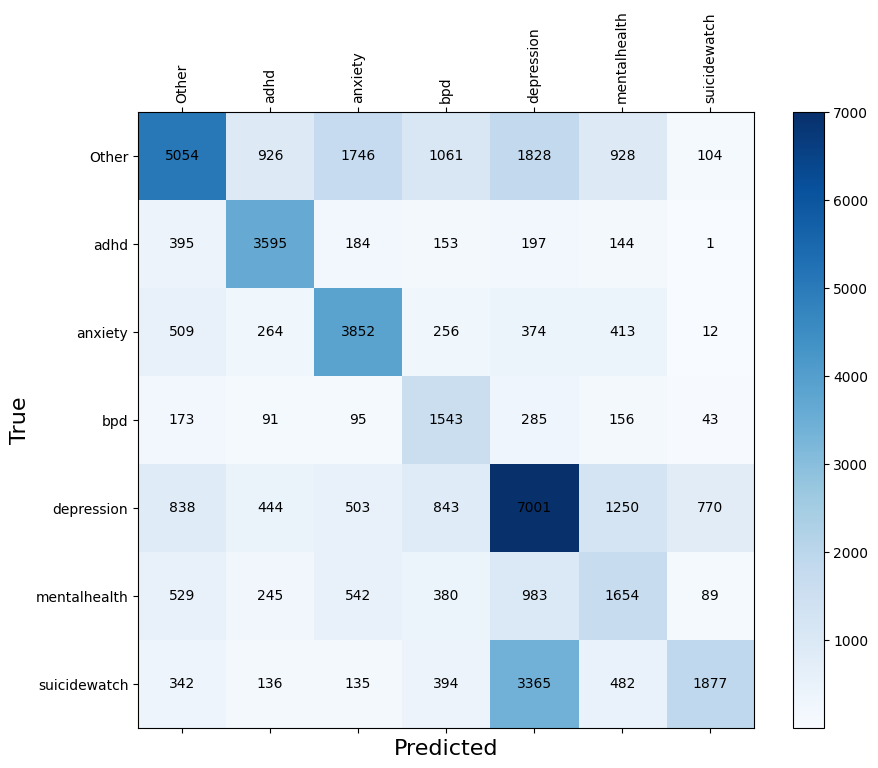

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the predicted classes
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded.values, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(cm, cmap='Blues')
fig.colorbar(cax)

# Set axis labels
ax.set_xticks(np.arange(len(y_test_encoded.columns)))
ax.set_yticks(np.arange(len(y_test_encoded.columns)))
ax.set_xticklabels(y_test_encoded.columns, rotation=90)
ax.set_yticklabels(y_test_encoded.columns)

# Set axis titles
plt.xlabel('Predicted', size=16)
plt.ylabel('True',size=16)
# plt.title('Confusion Matrix', size=20)

# Annotate each cell with the numeric value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), va='center', ha='center', color='black')

plt.show()

In [7]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5208545269582909
